# 12 绘图实例(4) Drawing example(4)
本文主要讲述seaborn官网相关函数绘图实例。具体内容有：
1. Scatterplot with varying point sizes and hues(relplot)
2. Scatterplot with categorical variables(swarmplot)
3. Scatterplot Matrix(pairplot)
4. Scatterplot with continuous hues and sizes(scatterplot)
5. Violinplots with observations(violinplot)
6. Discovering structure in heatmap data(clustermap)
7. Lineplot from a wide-form dataset(lineplot)
8. Violinplot from a wide-form dataset(violinplot)

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Scatterplot with varying point sizes and hues(relplot)

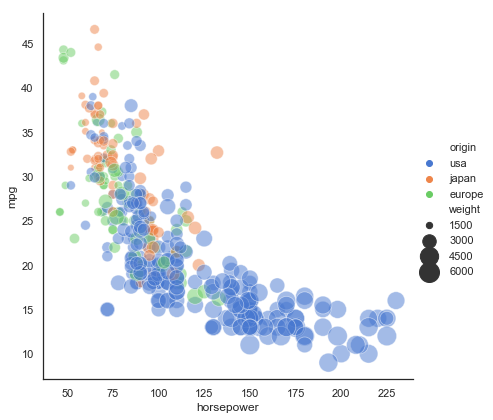

In [2]:
sns.set(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
# 其中x,y为横轴坐标变量，hue表示分类类别，size表示点的大小
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg);

## 2. Scatterplot with categorical variables(swarmplot)

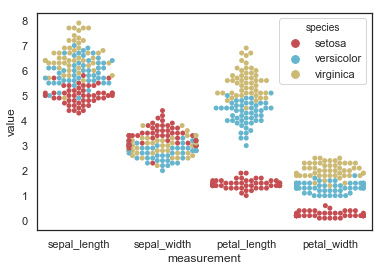

In [3]:
# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
# 合并数据集
iris = pd.melt(iris, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
# swarmplot将不同类别散点图用树状表示
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris);

## 3. Scatterplot Matrix(pairplot)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


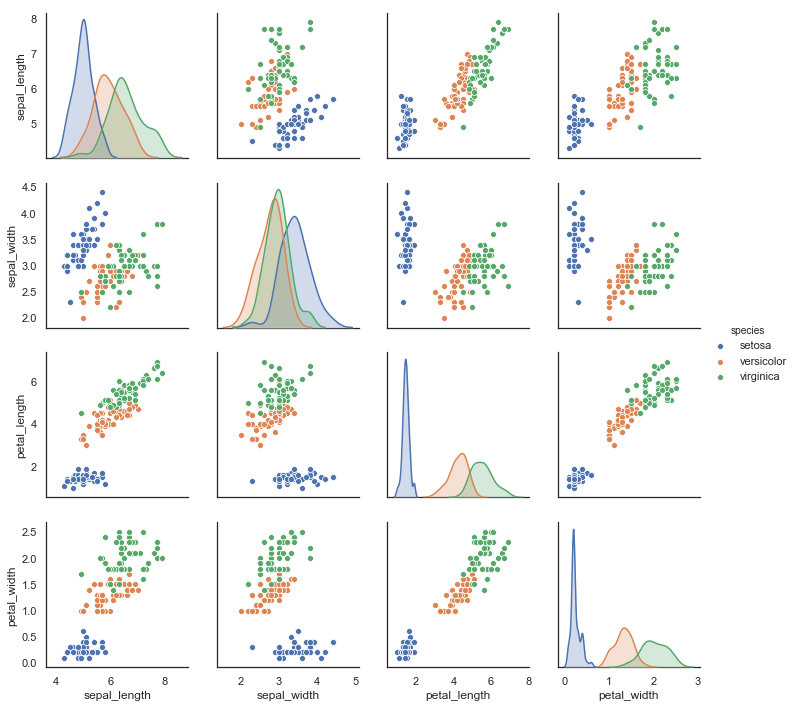

In [4]:
df = sns.load_dataset("iris")
#制作多变量图，hue为使用指定变量为分类变量画图
sns.pairplot(df, hue="species");

## 4. Scatterplot with continuous hues and sizes(scatterplot)

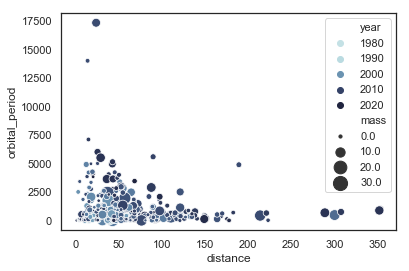

In [5]:
# Load the example iris dataset
planets = sns.load_dataset("planets")
# 设定颜色
#cubehelix_palette表示从cubehelix中制作顺序调色板
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="distance", y="orbital_period",
                     hue="year", size="mass",
                     palette=cmap, sizes=(10, 200),
                     data=planets)

## 5. Violinplots with observations(violinplot)

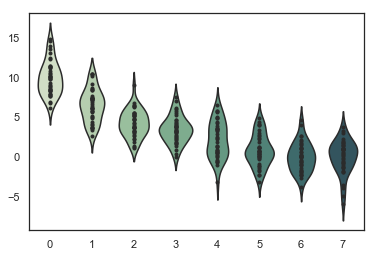

In [6]:
# Create a random dataset across several variables
rs = np.random.RandomState(0)
n, p = 40, 8
d = rs.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)

# Show each distribution with both violins and points
# 制作小提琴图，pal表示颜色
sns.violinplot(data=d, palette=pal, inner="points");

## 6. Discovering structure in heatmap data(clustermap)

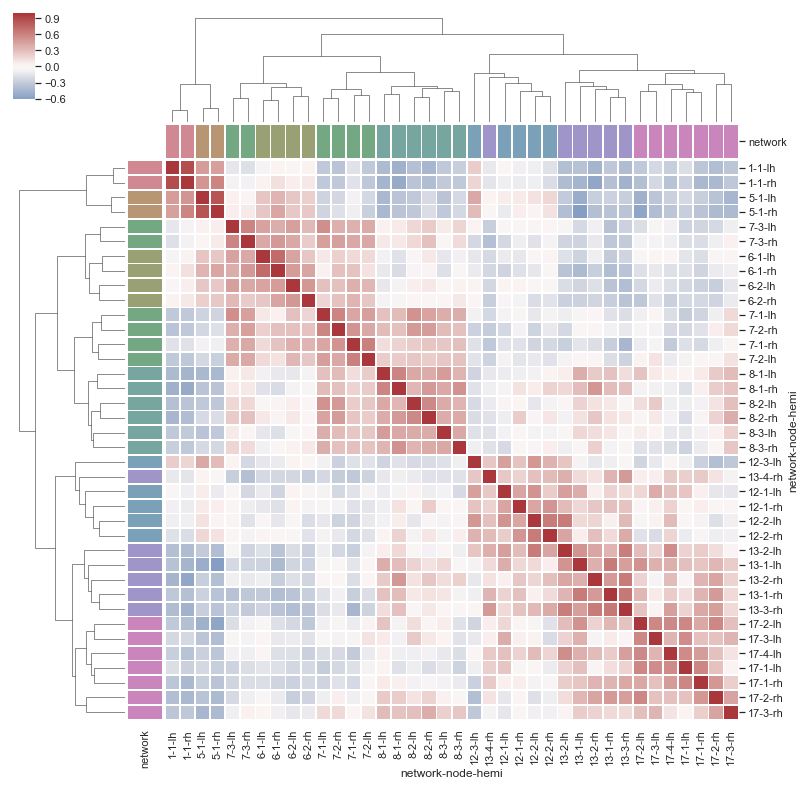

In [12]:
# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
# 建立矩阵类数据集
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
#创建调色盘
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
# 将矩阵数据集绘制为分层聚类热图
# row_colors,col_color行或列标记的颜色列表
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13));

## 7. Lineplot from a wide-form dataset(lineplot)

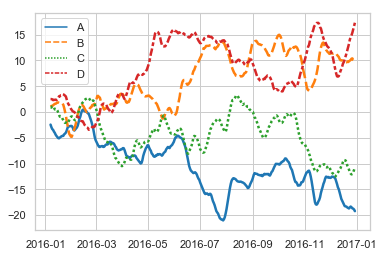

In [17]:
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

# 创建折线图
sns.lineplot(data=data, palette="tab10", linewidth=2.5);

## 8. Violinplot from a wide-form dataset(violinplot)

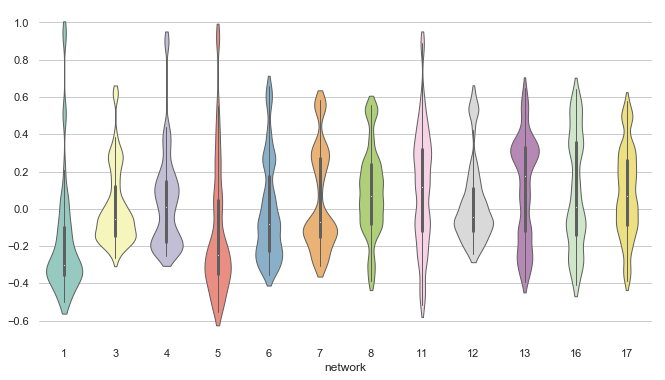

In [21]:
# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
#创建矩阵
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
# 计算相对系数和均值
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True);